In [2]:
import pandas as pd

df = pd.read_csv("car_data.csv")
df.head(1000)

,URL,Price,Transmission,Year,Motor Strength (KW),Mileage,Engine Capacity,Manufacturer,Model,Fuel Type
0,https://olx.ba/artikal/62227396,950 KM,Manuelni,1990,200.0,333.333km,1.1,Zastava,Zastava 128,Benzin
1,https://olx.ba/artikal/62204473,950 KM,Manuelni,2000,40.0,333.333km,1.0,Opel,Corsa,Benzin
2,https://olx.ba/artikal/61478194,900 KM,Manuelni,2002,62.0,230.000km,1.3,Hyundai,Accent,Benzin
3,https://olx.ba/artikal/62229580,750 KM,Manuelni,2000,0.0,0km,1.4,Renault,Clio,Benzin
4,https://olx.ba/artikal/62201533,950 KM,Manuelni,2001,59.0,250.000km,1.9,Fiat,Punto,Dizel
...,...,...,...,...,...,...,...,...,...,...
995,https://olx.ba/artikal/58183260,60.900 KM,Automatik,2016,185.0,210.369km,3.0,Mercedes-Benz,CLS 350,Dizel
996,https://olx.ba/artikal/62097196,121.480 KM,Automatik,2024,187.0,1km,3.3,Mazda,CX-60,Dizel
997,https://olx.ba/artikal/60546460,72.500 KM,Automatik,2019,143.0,143.000km,2.2,Mercedes-Benz,GLC 220,Dizel
998,https://olx.ba/artikal/62096083,129.580 KM,Automatik,2024,187.0,1km,3.3,Mazda,CX-60,Dizel


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13799 entries, 0 to 13798
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13799 non-null  object 
 1   Price                13799 non-null  object 
 2   Transmission         13799 non-null  object 
 3   Year                 13799 non-null  int64  
 4   Motor Strength (KW)  13799 non-null  float64
 5   Mileage              13799 non-null  object 
 6   Engine Capacity      13675 non-null  float64
 7   Manufacturer         13799 non-null  object 
 8   Model                13799 non-null  object 
 9   Fuel Type            13799 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 1.1+ MB


### PRICE

In [4]:
def clean_price(price):
    price = price.replace('.', '')
    if(',' in price):
        price = price.split(',')[0]
    else:
        price = price.split(' ')[0]
    if(price.isnumeric()):
        return int(price)
    return None

df['Price'] = df['Price'].apply(clean_price)
print(df['Price'].head())

0    950.0
1    950.0
2    900.0
3    750.0
4    950.0
Name: Price, dtype: float64


In [5]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13652 entries, 0 to 13798
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13652 non-null  object 
 1   Price                13652 non-null  float64
 2   Transmission         13652 non-null  object 
 3   Year                 13652 non-null  int64  
 4   Motor Strength (KW)  13652 non-null  float64
 5   Mileage              13652 non-null  object 
 6   Engine Capacity      13652 non-null  float64
 7   Manufacturer         13652 non-null  object 
 8   Model                13652 non-null  object 
 9   Fuel Type            13652 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 1.1+ MB


In [6]:
df.head(1000)

,URL,Price,Transmission,Year,Motor Strength (KW),Mileage,Engine Capacity,Manufacturer,Model,Fuel Type
0,https://olx.ba/artikal/62227396,950.0,Manuelni,1990,200.0,333.333km,1.1,Zastava,Zastava 128,Benzin
1,https://olx.ba/artikal/62204473,950.0,Manuelni,2000,40.0,333.333km,1.0,Opel,Corsa,Benzin
2,https://olx.ba/artikal/61478194,900.0,Manuelni,2002,62.0,230.000km,1.3,Hyundai,Accent,Benzin
3,https://olx.ba/artikal/62229580,750.0,Manuelni,2000,0.0,0km,1.4,Renault,Clio,Benzin
4,https://olx.ba/artikal/62201533,950.0,Manuelni,2001,59.0,250.000km,1.9,Fiat,Punto,Dizel
...,...,...,...,...,...,...,...,...,...,...
1021,https://olx.ba/artikal/55369185,91400.0,Automatik,2024,166.0,1km,2.0,Mazda,CX-5,Benzin
1022,https://olx.ba/artikal/58795432,64280.0,Automatik,2024,90.0,1km,2.0,Mazda,CX-30,Benzin
1023,https://olx.ba/artikal/58619014,62540.0,Manuelni,2024,97.0,3km,1.5,Mazda,MX-5,Benzin
1024,https://olx.ba/artikal/53360217,78730.0,Automatik,2024,145.0,1km,2.0,Toyota,Corolla Cross,Hibrid


In [7]:
df = df[df['Price'] > 400]
df = df.sort_values('Price')
df.head()

,URL,Price,Transmission,Year,Motor Strength (KW),Mileage,Engine Capacity,Manufacturer,Model,Fuel Type
159,https://olx.ba/artikal/60079744,499.0,Manuelni,2002,37.0,33.333.333km,1.3,Ford,Fiesta,Benzin
73,https://olx.ba/artikal/61894825,500.0,Manuelni,1997,33.0,111.100km,1.2,Opel,Corsa,Benzin
41,https://olx.ba/artikal/61998889,500.0,Manuelni,1981,44.0,300.000km,1.2,Volkswagen,Golf,Benzin
20,https://olx.ba/artikal/62073392,500.0,Manuelni,2000,37.0,36.520km,1.2,Fiat,Seicento,Benzin
81,https://olx.ba/artikal/61851873,550.0,Manuelni,1991,55.0,20km,1.6,Opel,Vectra,Benzin


### YEAR

In [8]:
def clean_year(year):
    return int(year)

df['Year'] = df['Year'].apply(clean_year)
print(df['Year'].head())

159    2002
73     1997
41     1981
20     2000
81     1991
Name: Year, dtype: int64


### TRANSMISSION

In [9]:
transmissions_list = df['Transmission']
transmissions_set = set()
for el in transmissions_list:
    transmissions_set.add(el)
print(transmissions_set)


{'Manuelni', 'Automatik'}


In [10]:

def clean_transmission(transmission):
    if(transmission == "Manuelni"):
        return 0
    elif(transmission == "Automatik"):
        return 1
    return None

df['Transmission'] = df['Transmission'].apply(clean_transmission)
print(df['Transmission'].head())

159    0
73     0
41     0
20     0
81     0
Name: Transmission, dtype: int64


In [11]:
df = df.dropna()

transmissions_list = df['Transmission']
transmissions_set = set()
for el in transmissions_list:
    transmissions_set.add(el)
print(transmissions_set)

{0, 1}


### MOTOR STRENGTH (KW)

In [12]:
motor_strength_list = df['Motor Strength (KW)']
motor_strength_list = sorted(motor_strength_list)
print(motor_strength_list)
print(df[df['Motor Strength (KW)'] > 1000])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3, 1.4, 1.5, 1.6, 1.6, 1.6, 1.6, 1.6, 1.8, 1.8, 1.9, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 3.0, 5.0, 5.0, 7.0, 7.0, 8.0, 8.0, 10.0, 11.0, 11.0, 11.0, 16.0, 18.0, 18.0, 19.0, 19.0, 22.0, 22.0, 22.0, 22.0, 23.0, 24.0, 24.0, 24.0, 25.0, 25.0, 25.0, 25.0, 25.0, 25.0, 29.0, 29.0, 30.0, 32.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 33.0, 34.0, 34.0, 34.0, 34.0, 34.0, 34.0, 35.0, 35.0, 35.0, 35.0, 35.0, 36.0, 37.0, 37.0, 37.0, 37.0, 37

(array([1.363e+04, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([     0. ,  55555.5, 111111. , 166666.5, 222222. , 277777.5,
        333333. , 388888.5, 444444. , 499999.5, 555555. ]),
 <BarContainer object of 10 artists>)

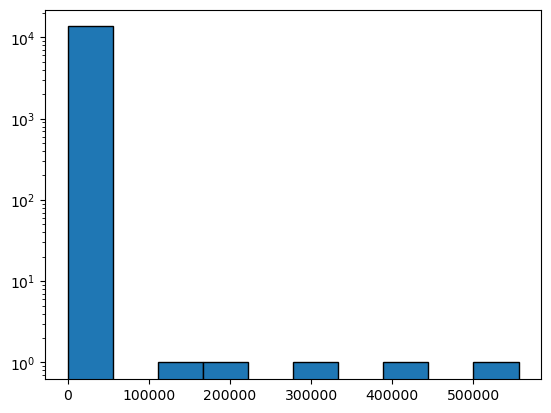

In [13]:
import matplotlib.pyplot as plt

# Convert 'Motor Strength (KW)' column to integers and plot histogram
motor_strength_int = [int(el) for el in motor_strength_list]
motor_strength_int.remove(max(motor_strength_int))
plt.hist(motor_strength_int, bins=10, edgecolor='black', log=True)

In [14]:
def clean_motor(power):
    return int(power)

df['Motor Strength (KW)'] = df['Motor Strength (KW)'].apply(clean_motor)
print(df['Motor Strength (KW)'].head())

159    37
73     33
41     44
20     37
81     55
Name: Motor Strength (KW), dtype: int64


In [15]:
# Filter rows based on 'Motor Strength (KW)' values
df = df[df['Motor Strength (KW)'] < 700]
df = df[df['Motor Strength (KW)'] > 30]

### MILEAGE

In [16]:
def clean_mileage(mileage):
    mileage = mileage.replace('.', '')
    if(',' in mileage):
        mileage = mileage.split(',')[0]
    else:
        mileage = mileage.split('km')[0]
    return int(mileage)

df['Mileage'] = df['Mileage'].apply(clean_mileage)
print(df['Mileage'].head())

159    33333333
73       111100
41       300000
20        36520
81           20
Name: Mileage, dtype: int64


(array([1.3448e+04, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([0.00000000e+00, 3.33333333e+12, 6.66666667e+12, 1.00000000e+13,
        1.33333333e+13, 1.66666667e+13, 2.00000000e+13, 2.33333333e+13,
        2.66666667e+13, 3.00000000e+13, 3.33333333e+13]),
 <BarContainer object of 10 artists>)

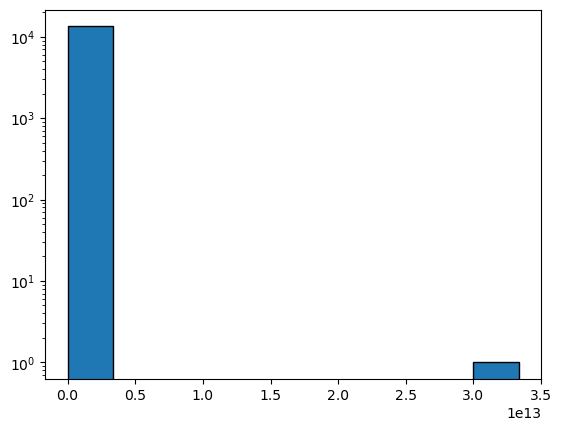

In [17]:
# Display and plot the 'Mileage' column
mileage_list = df['Mileage']
mileage_list = sorted(mileage_list)
plt.hist(mileage_list, bins=10, edgecolor='black', log=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13449 entries, 159 to 9108
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   URL                  13449 non-null  object 
 1   Price                13449 non-null  float64
 2   Transmission         13449 non-null  int64  
 3   Year                 13449 non-null  int64  
 4   Motor Strength (KW)  13449 non-null  int64  
 5   Mileage              13449 non-null  int64  
 6   Engine Capacity      13449 non-null  float64
 7   Manufacturer         13449 non-null  object 
 8   Model                13449 non-null  object 
 9   Fuel Type            13449 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 1.1+ MB


In [19]:
df = df[df['Mileage'] < 1000000]
df.head()

,URL,Price,Transmission,Year,Motor Strength (KW),Mileage,Engine Capacity,Manufacturer,Model,Fuel Type
73,https://olx.ba/artikal/61894825,500.0,0,1997,33,111100,1.2,Opel,Corsa,Benzin
41,https://olx.ba/artikal/61998889,500.0,0,1981,44,300000,1.2,Volkswagen,Golf,Benzin
20,https://olx.ba/artikal/62073392,500.0,0,2000,37,36520,1.2,Fiat,Seicento,Benzin
81,https://olx.ba/artikal/61851873,550.0,0,1991,55,20,1.6,Opel,Vectra,Benzin
141,https://olx.ba/artikal/61405255,600.0,0,1989,33,333333,1.1,Ford,Fiesta,Benzin


### ENGINE CAPACITY

(array([ 281., 3984., 6016.,  510., 2053.,  237.,  122.,   42.,   29.,
          49.]),
 array([0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. , 6.6]),
 <BarContainer object of 10 artists>)

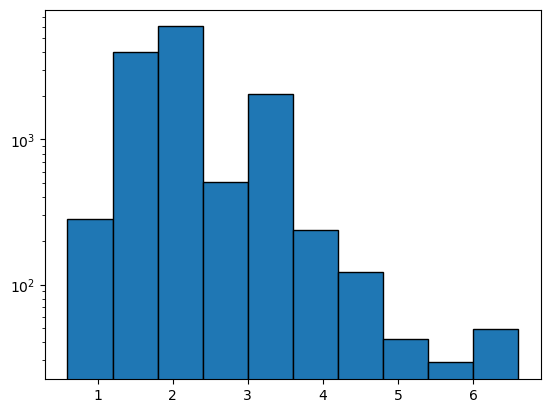

In [20]:
# Display and plot the 'Engine Capacity' column
engine_capacity_list = df['Engine Capacity']
engine_capacity_list = sorted(engine_capacity_list)
plt.hist(engine_capacity_list, bins=10, edgecolor='black', log=True)

### CORRELATION MATRIX HEATMAP

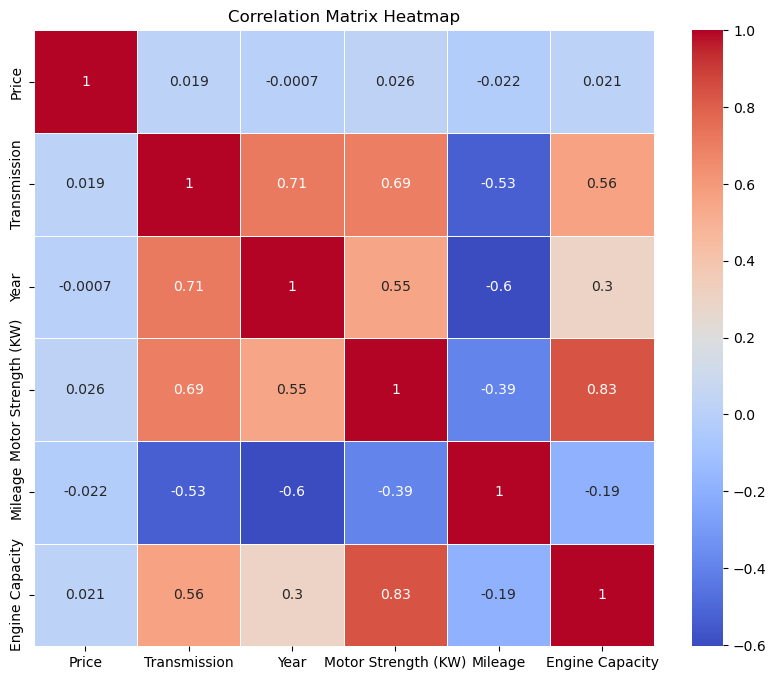

In [21]:
import seaborn as sns

help = df.drop(columns=['URL', 'Manufacturer', 'Model', 'Fuel Type'])
corr_matrix = help.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### OTHER

In [22]:
# Display unique values in 'Fuel Type', 'Model', and 'Manufacturer' columns

fuel_type_list = df['Fuel Type']
fuel_type_set = set()
for el in fuel_type_list:
    fuel_type_set.add(el)
print(fuel_type_set)

manufacturers_list = df['Manufacturer']
manufacturers_set = set()
for el in manufacturers_list:
    manufacturers_set.add(el)
print(manufacturers_set)

models_list = df['Model']
models_set = set()
for el in models_list:
    models_set.add(el)
print(models_set)

{'Plin', 'Hibrid', 'Benzin', 'Dizel'}
{'Saab', 'Isuzu', 'Porsche', 'MINI', 'Dodge', 'DS automobiles', 'Lancia', 'Ferrari', 'Chery', 'Land Rover', 'Zastava', 'Opel', 'Mazda', 'Renault', 'Chrysler', 'Ssangyong', 'Nissan', 'Maserati', 'Citroen', 'Škoda', 'Peugeot', 'Alfa Romeo', 'Wartburg', 'Alpina', 'Hummer', 'Hyundai', 'Toyota', 'Corvette', 'Daihatsu', 'Chevrolet', 'BMW', 'Subaru', 'Seat', 'Daewoo', 'Jaguar', 'Suzuki', 'Lincoln', 'Bentley', 'Audi', 'Rover', 'Volvo', 'Smart', 'Kia', 'Mercedes-Benz', 'Lexus', 'Ford', 'Lada', 'Jeep', 'Cupra', 'Fiat', 'Drugi', 'Mitsubishi', 'Dacia', 'Volkswagen', 'Lamborghini', 'Honda'}
{'4-Runner', 'F 350', 'Corolla', 'Sharan', 'Vento', 'i30', 'Megane Conquest', 'R 18', 'RAM', 'Caliber', 'Bronco', 'Q7', 'T-Roc', 'Rocks-e', 'E-Pace', 'Cargo', 'X 250', 'Tourneo', 'Thesis', '488', 'Touran', 'Phedra', 'Outlander', 'Trafic', 'S 550', 'Windstar', 'CX-30', 'i20', 'Avensis', 'Pixo', 'F 150', '992', 'Matiz', 'Alfa 145', '520', 'Fusion', 'Mii', 'Terios', '5008', 'Ti

In [23]:
df = df.drop(columns=['URL'])

# Filter and merge data based on 'Manufacturer' and 'Model'
grouped = df.groupby(['Manufacturer', 'Model']).size().reset_index(name='Count')
filtered = grouped[grouped['Count'] >= 5] # increase the number with a larger dataset
df = pd.merge(df, filtered[['Manufacturer', 'Model']], on=['Manufacturer', 'Model'], how='inner')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12575 entries, 0 to 12574
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Price                12575 non-null  float64
 1   Transmission         12575 non-null  int64  
 2   Year                 12575 non-null  int64  
 3   Motor Strength (KW)  12575 non-null  int64  
 4   Mileage              12575 non-null  int64  
 5   Engine Capacity      12575 non-null  float64
 6   Manufacturer         12575 non-null  object 
 7   Model                12575 non-null  object 
 8   Fuel Type            12575 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 884.3+ KB


In [24]:
manufacturers_list = df['Manufacturer']
manufacturers_set = set()
for el in manufacturers_list:
    manufacturers_set.add(el)
print(manufacturers_set)

models_list = df['Model']
models_set = set()
for el in models_list:
    models_set.add(el)
print(models_set)

{'Saab', 'Isuzu', 'Porsche', 'MINI', 'Dodge', 'DS automobiles', 'Chery', 'Land Rover', 'Zastava', 'Opel', 'Mazda', 'Renault', 'Nissan', 'Maserati', 'Citroen', 'Škoda', 'Alfa Romeo', 'Peugeot', 'Hummer', 'Hyundai', 'Toyota', 'Chevrolet', 'BMW', 'Subaru', 'Seat', 'Daewoo', 'Jaguar', 'Suzuki', 'Bentley', 'Volvo', 'Audi', 'Smart', 'Mercedes-Benz', 'Kia', 'Ford', 'Lada', 'Jeep', 'Cupra', 'Fiat', 'Mitsubishi', 'Dacia', 'Volkswagen', 'Honda'}
{'Corolla', 'Sharan', 'Vento', 'i30', 'Megane Conquest', 'Q7', 'T-Roc', 'X 250', 'Touran', 'Trafic', 'S 550', 'CX-30', 'i20', 'Avensis', '992', '520', 'Fusion', '5008', 'Buba / Beetle', 'Tiggo 8 Pro', 'Xsara Picasso', 'CLS 400', 'Alfa 159', '200', '306', 'Cherokee', 'GLE 400', 'CX-60', 'X-Type', 'T2', 'Amarok', 'Toledo', 'Ghibli', 'X5', 'Civic', '750', 'Yaris', '640 Gran Coupe', 'Fiesta', 'C 270', 'Scenic', 'G 63 AMG', 'V40', '118', 'Sportage', 'Xsara', 'Punto Evo', 'Kadett', 'Swift', 'C-Max', 'Golf', 'Niva', 'C3', 'Yugo Koral', 'Arteon', 'Octavia RS', '

In [25]:
# Copy and encode categorical columns
df_copy = df.copy()
df = pd.get_dummies(df, columns=['Model', 'Manufacturer', 'Fuel Type'])
print(df.shape)

# Concatenate the original and encoded dataframes
df = pd.concat([df, df_copy], axis=1, join='outer')
print(df.shape)

(12575, 388)
(12575, 397)


In [26]:
# Remove duplicate columns
df = df.loc[:, ~df.columns.duplicated()].copy()
print(df.shape)

(12575, 391)


In [27]:
# Save the cleaned data to a new CSV file
df.to_csv('cleaned_car_data.csv', index=False)
print("Data preprocessing completed.")

Data preprocessing completed.
